In [91]:
!pip install openpyxl
!pip install geopy


[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for geographiclib<3,>=1.52 from https://files.pythonhosted.org/packages/31/b3/802576f2ea5dcb48501bb162e4c7b7b3ca5654a42b2c968ef98a797a4c79/geographiclib-2.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 445.2 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/125.4 kB 657.6 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 738.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.7 kB ? eta -:--:--
   ---------------------------------------- 40.7/40.7 kB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Read road files

format: lat, lon, lrp, lat lon lrp, etc. for all unnamed columns

In [182]:
import pandas as pd
ROADS_FILE = r"infrastructure/_roads.tsv"

def load_roads():
    """Load roads TSV."""
    df = pd.read_csv(
        ROADS_FILE,
        sep="\t",
        engine="python",
        dtype=str  # preserve everything as string
    )
    return df

print("Loading roads...")
roads_df = load_roads()
print(roads_df.head())
print(f"Road rows: {len(roads_df)}\n")

Loading roads...
   road  lrp1                lat1        lon1    lrp2                lat2  \
0    N1  LRPS          23.7060278   90.443333   LRPSa          23.7029167   
1  N101  LRPS          23.4541389  91.2128611   LRPSa  23.461888899999998   
2  N102  LRPS          23.4789716  91.1181938   LRPSa          23.4815827   
3  N103  LRPS  23.957027800000002  91.1155278  LRP001          23.9619167   
4  N104  LRPS          23.0096667  91.3994163   LRPSa  23.009277800000003   

                lon2 Unnamed: 7          Unnamed: 8         Unnamed: 9  ...  \
0         90.4504167      LRPSb  23.702777800000003  90.45047220000001  ...   
1             91.212     LRP001  23.462944399999998         91.2118056  ...   
2         91.1167771      LRPSb          23.4866663  91.11336109999999  ...   
3  91.11361109999999    LRP001a           23.967666  91.11188890000001  ...   
4         91.3952497     LRP001          23.0093056         91.3898052  ...   

  Unnamed: 4035 Unnamed: 4036       Unnamed: 

In [183]:
print(roads_df.road.unique())

['N1' 'N101' 'N102' 'N103' 'N104' 'N105' 'N106' 'N107' 'N108' 'N109'
 'N110' 'N111' 'N112' 'N119' 'N120' 'N123' 'N124' 'N125' 'N126' 'N127'
 'N128' 'N129' 'N2' 'N203' 'N204' 'N205' 'N206' 'N207' 'N208' 'N209'
 'N210' 'N211' 'N212' 'N213' 'N3' 'N302' 'N303' 'N309' 'N4' 'N401' 'N402'
 'N403' 'N404' 'N405' 'N406' 'N407' 'N408' 'N5' 'N501' 'N502' 'N503'
 'N504' 'N505' 'N506' 'N507' 'N508' 'N509' 'N510' 'N511' 'N513' 'N514'
 'N515' 'N516' 'N517' 'N518' 'N519' 'N520' 'N540' 'N6' 'N602' 'N603'
 'N604' 'N605' 'N7' 'N701' 'N702' 'N703' 'N704' 'N705' 'N706' 'N707'
 'N708' 'N709' 'N710' 'N711' 'N712' 'N713' 'N715' 'N8' 'N801' 'N802'
 'N803' 'N804' 'N805' 'N806' 'N808' 'N809' 'R110' 'R111' 'R112' 'R113'
 'R114' 'R120' 'R140' 'R141' 'R142' 'R143' 'R144' 'R145' 'R146' 'R147'
 'R151' 'R152' 'R160' 'R161' 'R162' 'R163' 'R164' 'R170' 'R171' 'R172'
 'R180' 'R201' 'R202' 'R203' 'R210' 'R211' 'R212' 'R220' 'R221' 'R222'
 'R240' 'R241' 'R247' 'R248' 'R249' 'R250' 'R251' 'R280' 'R281' 'R282'
 'R283' 'R301' 

# Process road files

In [3]:
def process_roads(roads_df):
    """Processing roads."""
    return roads_df
    
roads_df = process_roads(roads_df)

# Write road files

In [116]:
roads_df.to_csv(
    ROADS_FILE,
    sep="\t",
    index=False,
    encoding="utf-8"
)
print("Saved output.")

Saved output.


# Read bridge files

In [184]:
BRIDGES_FILE = r"infrastructure/BMMS_overview.xlsx"

def load_bridges():
    """Load bridges Excel."""
    df = pd.read_excel(BRIDGES_FILE, dtype=str, engine="openpyxl")
    return df

print("Loading bridges...")
bridges_df = load_bridges()
print(bridges_df.head())
print(f"Bridge rows: {len(bridges_df)}\n")

Loading bridges...
  road      km              type  LRPName               name  length  \
0   N1     1.8       Box Culvert  LRP001a                  .    11.3   
1   N1   4.925       Box Culvert  LRP004b                  .     6.6   
2   N1   8.976  PC Girder Bridge  LRP008b  Kanch pur Bridge.  394.23   
3   N1   10.88       Box Culvert  LRP010b   NOYAPARA CULVERT     6.3   
4   N1  10.897       Box Culvert  LRP010c     ADUPUR CULVERT     6.3   

  condition structureNr                                           roadName  \
0         A      117861  Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...   
1         A      117862  Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...   
2         A      119889  Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...   
3         A      112531  Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...   
4         A      112532  Dhaka (Jatrabari)-Comilla (Mainamati)-Chittago...   

  chainage width constructionYear spans   zone circle     division  \
0      1.

# Process bridge files

In [ ]:
def process_bridges(bridges_df):
    """Processing bridges."""
    return bridges_df

bridges_df = process_bridges(bridges_df)

# Write bridge files

In [ ]:
bridges_df.to_excel(
    BRIDGES_FILE,
    index=False,
    sheet_name="BMMS_overview"
)
print("Saved output.")

## Inspection of a road with bridges

C:\Users\lukav\AppData\Local\Temp\ipykernel_27272\611283040.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat = float(row[col_idx + 1])
C:\Users\lukav\AppData\Local\Temp\ipykernel_27272\611283040.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lon = float(row[col_idx + 2])


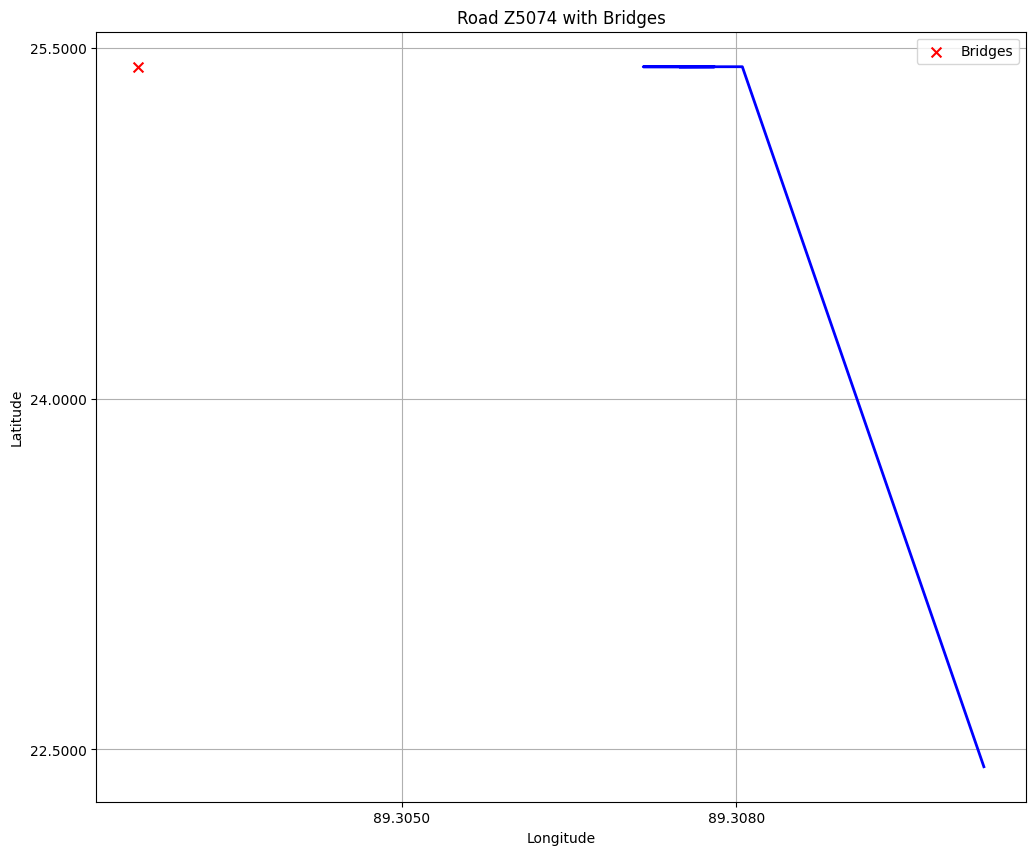

In [162]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

road_name = "Z5074"
road_data = roads_df[roads_df['road'] == road_name]

plt.figure(figsize=(12, 10))

for idx, row in road_data.iterrows():
    segment_coords = []
    col_idx = 1
    while col_idx + 2 < len(row):
        try:
            lat = float(row[col_idx + 1])
            lon = float(row[col_idx + 2])
            segment_coords.append((lon, lat))
        except (ValueError, TypeError):
            # Skip if value is missing or not convertible
            pass
        col_idx += 3
    
    if len(segment_coords) >= 2:
        segment_coords = np.array(segment_coords)
        plt.plot(segment_coords[:, 0], segment_coords[:, 1], color='blue', linewidth=2)

# Bridges
lat_col = 'lat'   # replace if your column name is different
lon_col = 'lon'

bridge_data = bridges_df[bridges_df['road'] == road_name]

# Convert to float and drop invalid values
bridge_coords = bridge_data[[lon_col, lat_col]].copy()
bridge_coords[lon_col] = pd.to_numeric(bridge_coords[lon_col], errors='coerce')
bridge_coords[lat_col] = pd.to_numeric(bridge_coords[lat_col], errors='coerce')
bridge_coords = bridge_coords.dropna()

# Now plot bridges
plt.scatter(bridge_coords[lon_col], bridge_coords[lat_col], color='red', marker='x', s=50, label='Bridges')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Road {road_name} with Bridges')
plt.grid(True)

# Only 3 ticks
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
ax.yaxis.set_major_locator(MaxNLocator(nbins=3))

# Format ticks
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.4f}"))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.4f}"))

plt.legend()
plt.show()


## Fix a particular road and displ

Selected road: N6
Road rows: 1
Bridge rows: 110
  Interpolated LRPs 145 to 145 (middle)
  Interpolated LRPs 209 to 219 (middle)
  Interpolated LRPs 400 to 400 (middle)

Updating 13 corrected LRPs in roads_df...
  Updated LRP078: (24.259972, 89.100806) -> (24.243111, 89.101069)
  Updated LRP107: (24.402611, 88.948277) -> (24.400972, 88.945454)
  Updated LRP108: (24.398850, 89.141533) -> (24.398361, 88.940824)
  Updated LRP108a: (24.395089, 89.334789) -> (24.395750, 88.936194)
  Updated LRP109: (24.391328, 89.528044) -> (24.393139, 88.931565)
  Updated LRP110: (24.387566, 89.721300) -> (24.390527, 88.926935)
  Updated LRP111: (24.383805, 89.914556) -> (24.387916, 88.922305)
  Updated LRP111a: (24.381494, 89.710550) -> (24.385305, 88.917676)
  Updated LRP112: (24.379183, 89.506544) -> (24.382694, 88.913046)
  Updated LRP112a: (24.376872, 89.302539) -> (24.380083, 88.908416)
  Updated LRP113: (24.374560, 89.098533) -> (24.377472, 88.903787)
  Updated LRP113a: (24.372249, 88.894527) -> (24.

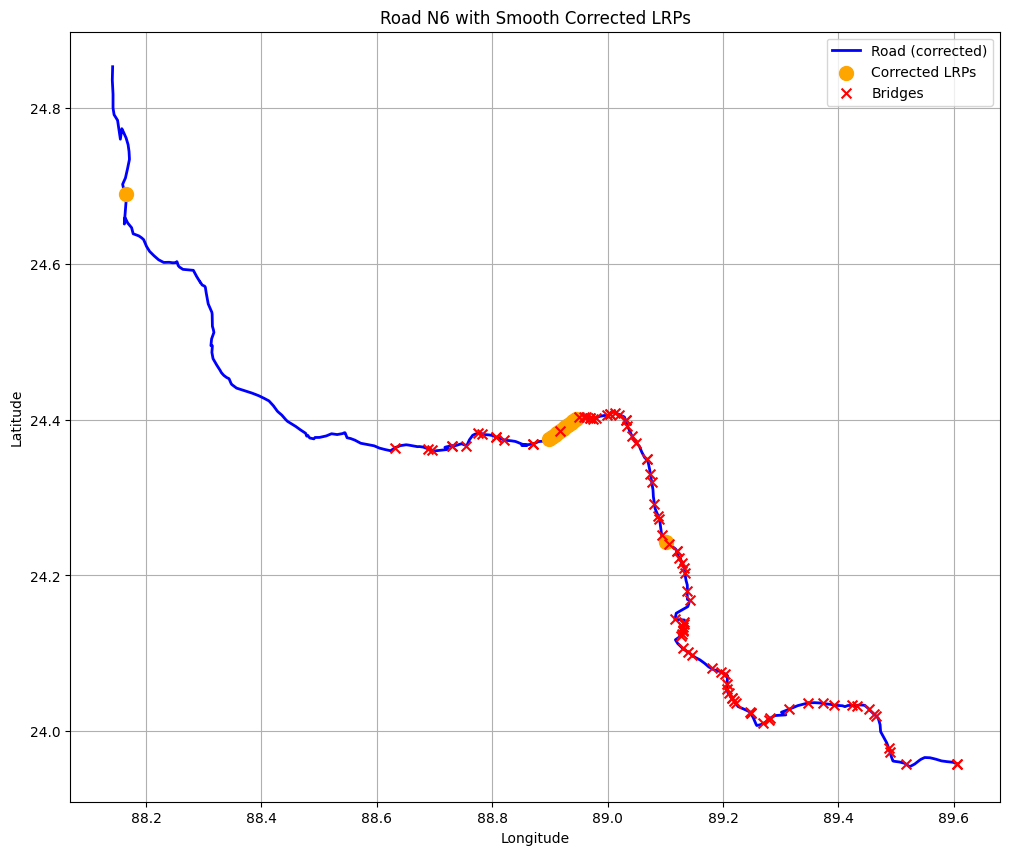


✓ LRP correction complete. Both roads_df and bridges_df have been updated.


In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Clean DataFrames ---
roads_df.columns = roads_df.columns.str.strip()
bridges_df.columns = bridges_df.columns.str.strip()

# Standardize road names
roads_df['road'] = roads_df['road'].astype(str).str.strip().str.upper()
bridges_df['road'] = bridges_df['road'].astype(str).str.strip().str.upper()

# Drop empty columns
roads_df = roads_df.dropna(axis=1, how='all')

# --- Select the road ---
road_name = "N6".strip().upper()
road_data = roads_df[roads_df['road'] == road_name].copy()
bridge_data = bridges_df[bridges_df['road'] == road_name].copy()

print(f"Selected road: {road_name}")
print("Road rows:", len(road_data))
print("Bridge rows:", len(bridge_data))

# --- Extract LRPs robustly ---
road_lrps = []
lrp_to_col_mapping = {}  # Track which column each LRP came from

for idx, row in road_data.iterrows():
    # Start from column 1, every 3 columns: LRP, lat, lon
    col_idx = 1
    while col_idx + 2 < len(row):
        lrp = row.iloc[col_idx]
        lat = row.iloc[col_idx + 1]
        lon = row.iloc[col_idx + 2]
        try:
            if pd.notna(lrp) and pd.notna(lat) and pd.notna(lon):
                lrp_str = str(lrp)
                road_lrps.append({
                    'lrp': lrp_str,
                    'lat': float(lat),
                    'lon': float(lon),
                    'original_lat': float(lat),
                    'original_lon': float(lon),
                    'col_idx': col_idx,
                    'row_idx': idx
                })
                lrp_to_col_mapping[lrp_str] = (idx, col_idx)
        except Exception as e:
            print(f"Skipping LRP at row {idx}, col {col_idx}: {e}")
        col_idx += 3

if not road_lrps:
    raise ValueError("No valid LRPs found for this road!")

# Convert to arrays
lrp_names = [p['lrp'] for p in road_lrps]
lrp_lats = np.array([p['lat'] for p in road_lrps])
lrp_lons = np.array([p['lon'] for p in road_lrps])
corrected_lrps = np.column_stack((lrp_lons, lrp_lats))

# --- Function for point-to-line deviation ---
def point_line_distance(p, a, b):
    p, a, b = np.array(p), np.array(a), np.array(b)
    if np.all(a == b):
        return np.linalg.norm(p - a)
    return np.abs(np.cross(b - a, a - p)) / np.linalg.norm(b - a)

def detect_wrong_lrps_sequences(corrected_lrps, factor_jump=10.0, factor_dev=3.0):
    n = len(corrected_lrps)
    wrong_flags = np.zeros(n, dtype=bool)

    # Compute distances between consecutive LRPs
    seg_lengths = np.linalg.norm(np.diff(corrected_lrps, axis=0), axis=1)
    median_spacing = np.median(seg_lengths)
    jump_threshold = factor_jump * median_spacing
    dev_threshold = factor_dev * median_spacing

    # Initial pass: detect large jumps
    for i in range(1, n):
        jump = np.linalg.norm(corrected_lrps[i] - corrected_lrps[i-1])
        if jump > jump_threshold:
            wrong_flags[i-1] = True
            wrong_flags[i] = True

    # Second pass: deviation from neighbors
    for i in range(1, n-1):
        if wrong_flags[i]:
            continue  # already flagged
        dist = point_line_distance(corrected_lrps[i], corrected_lrps[i-1], corrected_lrps[i+1])
        if dist > dev_threshold:
            wrong_flags[i] = True

    return wrong_flags

# Usage:
wrong_flags = detect_wrong_lrps_sequences(corrected_lrps, factor_jump=10.0, factor_dev=2.0)

# --- Identify sequences of wrong LRPs ---
wrong_sequences = []
seq_start = None
for i, flag in enumerate(wrong_flags):
    if flag:
        if seq_start is None:
            seq_start = i
    else:
        if seq_start is not None:
            wrong_sequences.append((seq_start, i-1))
            seq_start = None
if seq_start is not None:
    wrong_sequences.append((seq_start, len(corrected_lrps)-1))

# --- Interpolate/Extrapolate wrong LRPs ---
corrected_lrp_indices = []  # Track which LRPs were corrected

for start, end in wrong_sequences:
    prev_idx = start - 1
    next_idx = end + 1
    
    # Case 1: Wrong LRPs in the middle - interpolate
    if prev_idx >= 0 and next_idx < len(corrected_lrps):
        start_point = corrected_lrps[prev_idx]
        end_point = corrected_lrps[next_idx]
        num_points = end - start + 1
        corrected_lrps[start:end+1,0] = np.linspace(start_point[0], end_point[0], num_points+2)[1:-1]
        corrected_lrps[start:end+1,1] = np.linspace(start_point[1], end_point[1], num_points+2)[1:-1]
        corrected_lrp_indices.extend(range(start, end+1))
        print(f"  Interpolated LRPs {start} to {end} (middle)")
    
    # Case 2: Wrong LRPs at the beginning - extrapolate from first good points
    elif prev_idx < 0 and next_idx < len(corrected_lrps):
        # Find the next few good points to establish direction
        ref_points = []
        for i in range(next_idx, min(next_idx + 3, len(corrected_lrps))):
            if not wrong_flags[i]:
                ref_points.append(corrected_lrps[i])
        
        if len(ref_points) >= 2:
            # Calculate average direction from good points
            direction = ref_points[1] - ref_points[0]
            # Calculate average spacing
            spacing = np.linalg.norm(direction)
            direction_unit = direction / spacing if spacing > 0 else np.array([0, 0])
            
            # Extrapolate backwards
            for i in range(end, -1, -1):
                steps_back = next_idx - i
                corrected_lrps[i] = ref_points[0] - direction_unit * spacing * steps_back
            
            corrected_lrp_indices.extend(range(start, end+1))
            print(f"  Extrapolated LRPs {start} to {end} (beginning)")
        else:
            # Fallback: just use the first good point
            for i in range(start, end+1):
                corrected_lrps[i] = corrected_lrps[next_idx]
            corrected_lrp_indices.extend(range(start, end+1))
            print(f"  Set LRPs {start} to {end} to first good point (beginning fallback)")
    
    # Case 3: Wrong LRPs at the end - extrapolate from last good points
    elif prev_idx >= 0 and next_idx >= len(corrected_lrps):
        # Find the previous few good points to establish direction
        ref_points = []
        for i in range(prev_idx, max(prev_idx - 3, -1), -1):
            if not wrong_flags[i]:
                ref_points.append(corrected_lrps[i])
        
        if len(ref_points) >= 2:
            # Calculate average direction from good points
            direction = ref_points[0] - ref_points[1]
            # Calculate average spacing
            spacing = np.linalg.norm(direction)
            direction_unit = direction / spacing if spacing > 0 else np.array([0, 0])
            
            # Extrapolate forwards
            for i in range(start, end+1):
                steps_forward = i - prev_idx
                corrected_lrps[i] = ref_points[0] + direction_unit * spacing * steps_forward
            
            corrected_lrp_indices.extend(range(start, end+1))
            print(f"  Extrapolated LRPs {start} to {end} (end)")
        else:
            # Fallback: just use the last good point
            for i in range(start, end+1):
                corrected_lrps[i] = corrected_lrps[prev_idx]
            corrected_lrp_indices.extend(range(start, end+1))
            print(f"  Set LRPs {start} to {end} to last good point (end fallback)")
    
    # Case 4: All LRPs are wrong (shouldn't happen with good data)
    else:
        print(f"  WARNING: Cannot correct LRPs {start} to {end} - no reference points!")

# --- Update roads_df with corrected coordinates ---
print(f"\nUpdating {len(corrected_lrp_indices)} corrected LRPs in roads_df...")
for i in corrected_lrp_indices:
    lrp_info = road_lrps[i]
    row_idx = lrp_info['row_idx']
    col_idx = lrp_info['col_idx']
    
    # Update lat and lon in roads_df
    roads_df.at[row_idx, roads_df.columns[col_idx + 1]] = corrected_lrps[i, 1]  # lat
    roads_df.at[row_idx, roads_df.columns[col_idx + 2]] = corrected_lrps[i, 0]  # lon
    
    print(f"  Updated {lrp_info['lrp']}: "
          f"({lrp_info['original_lat']:.6f}, {lrp_info['original_lon']:.6f}) -> "
          f"({corrected_lrps[i, 1]:.6f}, {corrected_lrps[i, 0]:.6f})")

# --- Update bridges_df with corrected coordinates ---
# Create a mapping of LRP names to their corrected coordinates
lrp_coord_map = {lrp_names[i]: (corrected_lrps[i, 1], corrected_lrps[i, 0]) 
                 for i in range(len(lrp_names))}

# Update bridge coordinates
bridges_updated = 0
for idx, bridge in bridge_data.iterrows():
    lrp = bridge['LRPName']
    if lrp in lrp_coord_map and lrp_names.index(lrp) in corrected_lrp_indices:
        new_lat, new_lon = lrp_coord_map[lrp]
        old_lat = bridge['lat']
        old_lon = bridge['lon']
        
        # Update in the main bridges_df
        bridges_df.at[idx, 'lat'] = new_lat
        bridges_df.at[idx, 'lon'] = new_lon
        
        print(f"\nUpdated bridge at LRP {lrp}:")
        print(f"  Old coords: ({old_lat:.4f}, {old_lon:.4f})")
        print(f"  New coords: ({new_lat:.4f}, {new_lon:.4f})")
        bridges_updated += 1

print(f"\nTotal bridges updated: {bridges_updated}")

# --- Plot road and bridges ---
plt.figure(figsize=(12,10))
plt.plot(corrected_lrps[:,0], corrected_lrps[:,1], color='blue', linewidth=2, label='Road (corrected)')
if np.any(wrong_flags):
    plt.scatter(corrected_lrps[wrong_flags,0], corrected_lrps[wrong_flags,1],
                color='orange', s=100, label='Corrected LRPs', zorder=5)

# Plot bridges
bridge_coords = []
for idx, bridge in bridge_data.iterrows():
    lrp = bridge['LRPName']
    if lrp in lrp_names:
        bridge_idx = lrp_names.index(lrp)
        bridge_coords.append(corrected_lrps[bridge_idx])

if bridge_coords:
    bridge_coords = np.array(bridge_coords)
    plt.scatter(bridge_coords[:,0], bridge_coords[:,1], color='red', marker='x',
                s=50, label='Bridges', zorder=6)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Road {road_name} with Smooth Corrected LRPs')
plt.grid(True)
plt.legend()
plt.show()

# --- Save updated dataframes (optional) ---
# roads_df.to_csv('roads_updated.csv', index=False)
# bridges_df.to_csv('bridges_updated.csv', index=False)
print("\n✓ LRP correction complete. Both roads_df and bridges_df have been updated.")

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Clean DataFrames ---
roads_df.columns = roads_df.columns.str.strip()
bridges_df.columns = bridges_df.columns.str.strip()

# Standardize road names
roads_df['road'] = roads_df['road'].astype(str).str.strip().str.upper()
bridges_df['road'] = bridges_df['road'].astype(str).str.strip().str.upper()

# Drop empty columns
roads_df = roads_df.dropna(axis=1, how='all')

# --- Function for point-to-line deviation ---
def point_line_distance(p, a, b):
    p, a, b = np.array(p), np.array(a), np.array(b)
    if np.all(a == b):
        return np.linalg.norm(p - a)
    return np.abs(np.cross(b - a, a - p)) / np.linalg.norm(b - a)

def detect_wrong_lrps_sequences(corrected_lrps, factor_jump=10.0, factor_dev=3.0):
    n = len(corrected_lrps)
    wrong_flags = np.zeros(n, dtype=bool)

    # Compute distances between consecutive LRPs
    seg_lengths = np.linalg.norm(np.diff(corrected_lrps, axis=0), axis=1)
    if len(seg_lengths) == 0:
        return wrong_flags
    
    median_spacing = np.median(seg_lengths)
    jump_threshold = factor_jump * median_spacing
    dev_threshold = factor_dev * median_spacing

    # Initial pass: detect large jumps
    for i in range(1, n):
        jump = np.linalg.norm(corrected_lrps[i] - corrected_lrps[i-1])
        if jump > jump_threshold:
            wrong_flags[i-1] = True
            wrong_flags[i] = True

    # Second pass: deviation from neighbors
    for i in range(1, n-1):
        if wrong_flags[i]:
            continue  # already flagged
        dist = point_line_distance(corrected_lrps[i], corrected_lrps[i-1], corrected_lrps[i+1])
        if dist > dev_threshold:
            wrong_flags[i] = True

    return wrong_flags

def process_road(road_name, roads_df, bridges_df, factor_jump=10.0, factor_dev=3.0):
    """Process a single road and return correction information."""
    
    road_data = roads_df[roads_df['road'] == road_name].copy()
    bridge_data = bridges_df[bridges_df['road'] == road_name].copy()
    
    if len(road_data) == 0:
        return None
    
    # --- Extract LRPs robustly ---
    road_lrps = []
    
    for idx, row in road_data.iterrows():
        # Start from column 1, every 3 columns: LRP, lat, lon
        col_idx = 1
        while col_idx + 2 < len(row):
            lrp = row.iloc[col_idx]
            lat = row.iloc[col_idx + 1]
            lon = row.iloc[col_idx + 2]
            try:
                if pd.notna(lrp) and pd.notna(lat) and pd.notna(lon):
                    lrp_str = str(lrp)
                    road_lrps.append({
                        'lrp': lrp_str,
                        'lat': float(lat),
                        'lon': float(lon),
                        'original_lat': float(lat),
                        'original_lon': float(lon),
                        'col_idx': col_idx,
                        'row_idx': idx
                    })
            except Exception as e:
                pass  # Skip invalid entries
            col_idx += 3
    
    if len(road_lrps) < 3:  # Need at least 3 points for meaningful correction
        return None
    
    # Convert to arrays
    lrp_names = [p['lrp'] for p in road_lrps]
    lrp_lats = np.array([p['lat'] for p in road_lrps])
    lrp_lons = np.array([p['lon'] for p in road_lrps])
    corrected_lrps = np.column_stack((lrp_lons, lrp_lats))
    
    # Detect wrong LRPs
    wrong_flags = detect_wrong_lrps_sequences(corrected_lrps, factor_jump, factor_dev)
    
    if not np.any(wrong_flags):
        return None  # No corrections needed
    
    # --- Identify sequences of wrong LRPs ---
    wrong_sequences = []
    seq_start = None
    for i, flag in enumerate(wrong_flags):
        if flag:
            if seq_start is None:
                seq_start = i
        else:
            if seq_start is not None:
                wrong_sequences.append((seq_start, i-1))
                seq_start = None
    if seq_start is not None:
        wrong_sequences.append((seq_start, len(corrected_lrps)-1))
    
    # --- Interpolate/Extrapolate wrong LRPs ---
    corrected_lrp_indices = []
    
    for start, end in wrong_sequences:
        prev_idx = start - 1
        next_idx = end + 1
        
        # Case 1: Wrong LRPs in the middle - interpolate
        if prev_idx >= 0 and next_idx < len(corrected_lrps):
            start_point = corrected_lrps[prev_idx]
            end_point = corrected_lrps[next_idx]
            num_points = end - start + 1
            corrected_lrps[start:end+1,0] = np.linspace(start_point[0], end_point[0], num_points+2)[1:-1]
            corrected_lrps[start:end+1,1] = np.linspace(start_point[1], end_point[1], num_points+2)[1:-1]
            corrected_lrp_indices.extend(range(start, end+1))
        
        # Case 2: Wrong LRPs at the beginning - extrapolate from first good points
        elif prev_idx < 0 and next_idx < len(corrected_lrps):
            # Find the next few good points to establish direction
            ref_points = []
            for i in range(next_idx, min(next_idx + 3, len(corrected_lrps))):
                if not wrong_flags[i]:
                    ref_points.append(corrected_lrps[i])
            
            if len(ref_points) >= 2:
                # Calculate average direction from good points
                direction = ref_points[1] - ref_points[0]
                # Calculate average spacing
                spacing = np.linalg.norm(direction)
                direction_unit = direction / spacing if spacing > 0 else np.array([0, 0])
                
                # Extrapolate backwards
                for i in range(end, -1, -1):
                    steps_back = next_idx - i
                    corrected_lrps[i] = ref_points[0] - direction_unit * spacing * steps_back
                
                corrected_lrp_indices.extend(range(start, end+1))
            else:
                # Fallback: just use the first good point
                for i in range(start, end+1):
                    corrected_lrps[i] = corrected_lrps[next_idx]
                corrected_lrp_indices.extend(range(start, end+1))
        
        # Case 3: Wrong LRPs at the end - extrapolate from last good points
        elif prev_idx >= 0 and next_idx >= len(corrected_lrps):
            # Find the previous few good points to establish direction
            ref_points = []
            for i in range(prev_idx, max(prev_idx - 3, -1), -1):
                if not wrong_flags[i]:
                    ref_points.append(corrected_lrps[i])
            
            if len(ref_points) >= 2:
                # Calculate average direction from good points
                direction = ref_points[0] - ref_points[1]
                # Calculate average spacing
                spacing = np.linalg.norm(direction)
                direction_unit = direction / spacing if spacing > 0 else np.array([0, 0])
                
                # Extrapolate forwards
                for i in range(start, end+1):
                    steps_forward = i - prev_idx
                    corrected_lrps[i] = ref_points[0] + direction_unit * spacing * steps_forward
                
                corrected_lrp_indices.extend(range(start, end+1))
            else:
                # Fallback: just use the last good point
                for i in range(start, end+1):
                    corrected_lrps[i] = corrected_lrps[prev_idx]
                corrected_lrp_indices.extend(range(start, end+1))
    
    return {
        'road_name': road_name,
        'road_lrps': road_lrps,
        'lrp_names': lrp_names,
        'corrected_lrps': corrected_lrps,
        'corrected_indices': corrected_lrp_indices,
        'bridge_data': bridge_data
    }

# --- Process all roads ---
all_roads = roads_df['road'].unique()
total_roads = len(all_roads)
total_lrps_corrected = 0
total_bridges_updated = 0
roads_with_corrections = 0

print(f"Processing {total_roads} roads...")
print("=" * 80)

for road_idx, road_name in enumerate(all_roads, 1):
    result = process_road(road_name, roads_df, bridges_df)
    
    if result is None:
        continue  # No corrections needed for this road
    
    roads_with_corrections += 1
    road_lrps = result['road_lrps']
    lrp_names = result['lrp_names']
    corrected_lrps = result['corrected_lrps']
    corrected_indices = result['corrected_indices']
    bridge_data = result['bridge_data']
    
    print(f"\n[{road_idx}/{total_roads}] Road: {road_name}")
    print(f"  LRPs corrected: {len(corrected_indices)}")
    
    # --- Update roads_df with corrected coordinates ---
    for i in corrected_indices:
        lrp_info = road_lrps[i]
        row_idx = lrp_info['row_idx']
        col_idx = lrp_info['col_idx']
        
        # Update lat and lon in roads_df
        roads_df.at[row_idx, roads_df.columns[col_idx + 1]] = corrected_lrps[i, 1]  # lat
        roads_df.at[row_idx, roads_df.columns[col_idx + 2]] = corrected_lrps[i, 0]  # lon
        
        total_lrps_corrected += 1
    
    # --- Update bridges_df with corrected coordinates ---
    lrp_coord_map = {lrp_names[i]: (corrected_lrps[i, 1], corrected_lrps[i, 0]) 
                     for i in range(len(lrp_names))}
    
    bridges_updated_this_road = 0
    for idx, bridge in bridge_data.iterrows():
        lrp = bridge['LRPName']
        if lrp in lrp_coord_map and lrp_names.index(lrp) in corrected_indices:
            new_lat, new_lon = lrp_coord_map[lrp]
            
            # Update in the main bridges_df
            bridges_df.at[idx, 'lat'] = new_lat
            bridges_df.at[idx, 'lon'] = new_lon
            
            bridges_updated_this_road += 1
            total_bridges_updated += 1
    
    if bridges_updated_this_road > 0:
        print(f"  Bridges updated: {bridges_updated_this_road}")

print("\n" + "=" * 80)
print(f"\n✓ Processing complete!")
print(f"  Roads with corrections: {roads_with_corrections}/{total_roads}")
print(f"  Total LRPs corrected: {total_lrps_corrected}")
print(f"  Total bridges updated: {total_bridges_updated}")
print(f"\nBoth roads_df and bridges_df have been updated in place.")

# --- Optional: Save updated dataframes ---
# roads_df.to_csv('roads_corrected.csv', index=False)
# bridges_df.to_csv('bridges_corrected.csv', index=False)
# print("\n✓ Updated dataframes saved to CSV files.")

# --- Optional: Plot a specific road ---
def plot_road(road_name, roads_df, bridges_df):
    """Plot a specific road with corrections."""
    result = process_road(road_name, roads_df, bridges_df)
    
    if result is None:
        print(f"No corrections needed for road {road_name}")
        return
    
    corrected_lrps = result['corrected_lrps']
    corrected_indices = result['corrected_indices']
    lrp_names = result['lrp_names']
    bridge_data = result['bridge_data']
    
    plt.figure(figsize=(12,10))
    plt.plot(corrected_lrps[:,0], corrected_lrps[:,1], color='blue', linewidth=2, label='Road (corrected)')
    
    if len(corrected_indices) > 0:
        wrong_flags = np.zeros(len(corrected_lrps), dtype=bool)
        wrong_flags[corrected_indices] = True
        plt.scatter(corrected_lrps[wrong_flags,0], corrected_lrps[wrong_flags,1],
                    color='orange', s=100, label='Corrected LRPs', zorder=5)
    
    # Plot bridges
    bridge_coords = []
    for idx, bridge in bridge_data.iterrows():
        lrp = bridge['LRPName']
        if lrp in lrp_names:
            bridge_idx = lrp_names.index(lrp)
            bridge_coords.append(corrected_lrps[bridge_idx])
    
    if bridge_coords:
        bridge_coords = np.array(bridge_coords)
        plt.scatter(bridge_coords[:,0], bridge_coords[:,1], color='red', marker='x',
                    s=50, label='Bridges', zorder=6)
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Road {road_name} with Corrected LRPs')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example: Plot a specific road if you want to visualize
# plot_road("N8", roads_df, bridges_df)

Processing 885 roads...

[1/885] Road: N1
  LRPs corrected: 41
  Bridges updated: 10

[3/885] Road: N102
  LRPs corrected: 18
  Bridges updated: 8

[12/885] Road: N111
  LRPs corrected: 2

[23/885] Road: N2
  LRPs corrected: 41
  Bridges updated: 25

[25/885] Road: N204
  LRPs corrected: 6
  Bridges updated: 1

[28/885] Road: N207
  LRPs corrected: 7
  Bridges updated: 2

[29/885] Road: N208
  LRPs corrected: 3

[32/885] Road: N211
  LRPs corrected: 2

[39/885] Road: N4
  LRPs corrected: 10
  Bridges updated: 3

[41/885] Road: N402
  LRPs corrected: 2

[45/885] Road: N406
  LRPs corrected: 2

[48/885] Road: N5
  LRPs corrected: 6
  Bridges updated: 1

[50/885] Road: N502
  LRPs corrected: 3

[55/885] Road: N507
  LRPs corrected: 4
  Bridges updated: 1

[59/885] Road: N511
  LRPs corrected: 3

[62/885] Road: N515
  LRPs corrected: 1

[69/885] Road: N6
  LRPs corrected: 12

[70/885] Road: N602
  LRPs corrected: 9
  Bridges updated: 3

[72/885] Road: N604
  LRPs corrected: 1

[74/885] Roa

In [179]:
roads_df.to_csv(
    ROADS_FILE,
    sep="\t",
    index=False,
    encoding="utf-8"
)
print("Saved output.")

Saved output.


In [180]:
bridges_df.to_excel(
    BRIDGES_FILE,
    index=False,
    sheet_name="BMMS_overview"
)
print("Saved output.")

Saved output.
